In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

cid = #INSERT
secret = #INSERT
username = #INSERT

#Modify the scope as needed.
scope = 'user-top-read user-library-read playlist-modify-public playlist-read-private'

redirect_uri= #INSERT

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

token = util.prompt_for_user_token(username, scope, cid, secret, redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)


In [2]:
def get_playlist(playlist_id):
    if playlist_id is None:
        playlist_id = raw_input('Playlist ID: ')
        while 'user:' not in playlist_id:
            playlist_id = raw_input('Playlist ID: ')

    user = (playlist_id.split("user:")[1]).split(":playlist")[0]
    playlist = sp.user_playlist(user, playlist_id, fields='tracks, name')
    return playlist

In [3]:
def get_playlist_name(playlist):
    name = playlist['name']
    return name

In [4]:
def all_playlist_tracks(playlist):
    results = playlist['tracks']
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [5]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt


def get_genres_from_playlist(playlist_id):
    genre_count = {}
    playlist = get_playlist(playlist_id)
    tracks = all_playlist_tracks(playlist)
    for item in tracks:
        track = item['track']
        artists = track['artists']
        for artist in artists:
            artist_id = artist['id']
            if artist_id is not None:
                artist_obj = sp.artist(artist_id)
                genres = artist_obj['genres']
                for genre in genres:
                    if genre in genre_count:
                        genre_count[genre] = genre_count[genre] + 1;
                    else:
                        genre_count[genre] = 1;
    return genre_count       

def create_word_cloud(genre_count):
    wc = WordCloud(background_color="white",width= 500,height=250, min_font_size = 5, relative_scaling=0.5, scale = 2, normalize_plurals=False).generate_from_frequencies(genre_count)
    plt.figure(figsize=(40,20))
    plt.imshow(wc)
    plt.axis("off")
    return plt

In [6]:
import pandas as pd

def get_audio_features_from_playlist(playlist_id):
    ids = []
    names = []
    playlist = get_playlist(playlist_id)
    playlist_name = get_playlist_name(playlist)
    tracks = all_playlist_tracks(playlist)
    for track in tracks:
        id = track['track']['id']
        ids.append(id)
        name = track['track']['name'].encode('utf-8')
        names.append(name)

    audio_features = sp.audio_features(ids)

    df = pd.DataFrame(audio_features, index=names)

    df = df[["acousticness", "danceability", "duration_ms",
                             "energy", "instrumentalness", "key", "liveness",
                             "loudness", "mode", "speechiness", "tempo", "valence"]]
    return df

In [7]:
top_songs_2018 = 'spotify:user:spotify:playlist:37i9dQZF1EjvqNbJ8qQ9Sl'
taste_breakers = 'spotify:user:spotify:playlist:37i9dQZF1Ej34cnpZDES5M'

In [10]:
top_genres = get_genres_from_playlist(top_songs_2018) 

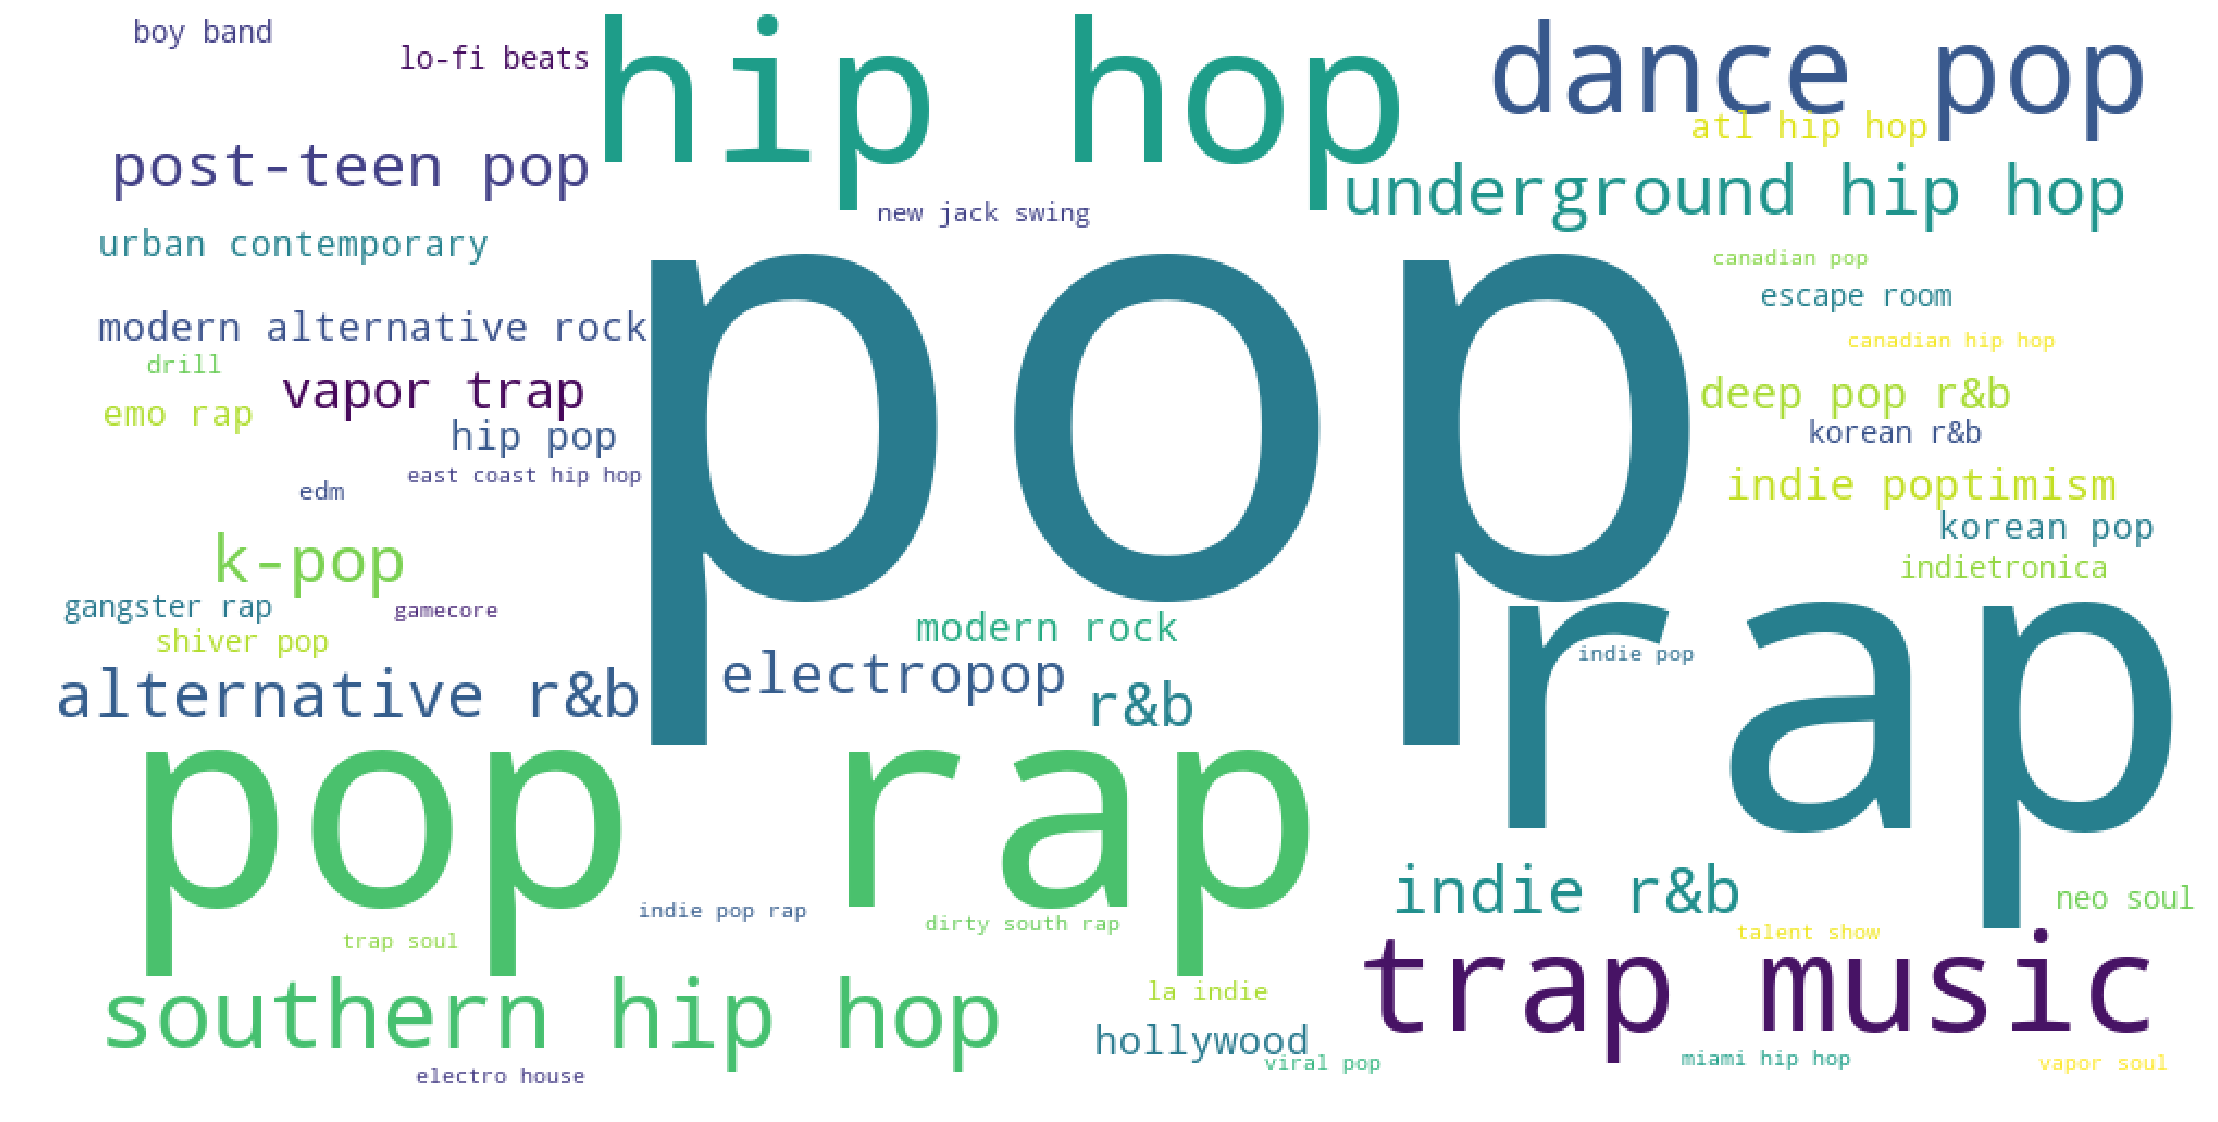

In [11]:
top_wc = create_word_cloud(top_genres)
top_wc.show()

In [12]:
taste_genres = get_genres_from_playlist(taste_breakers) 

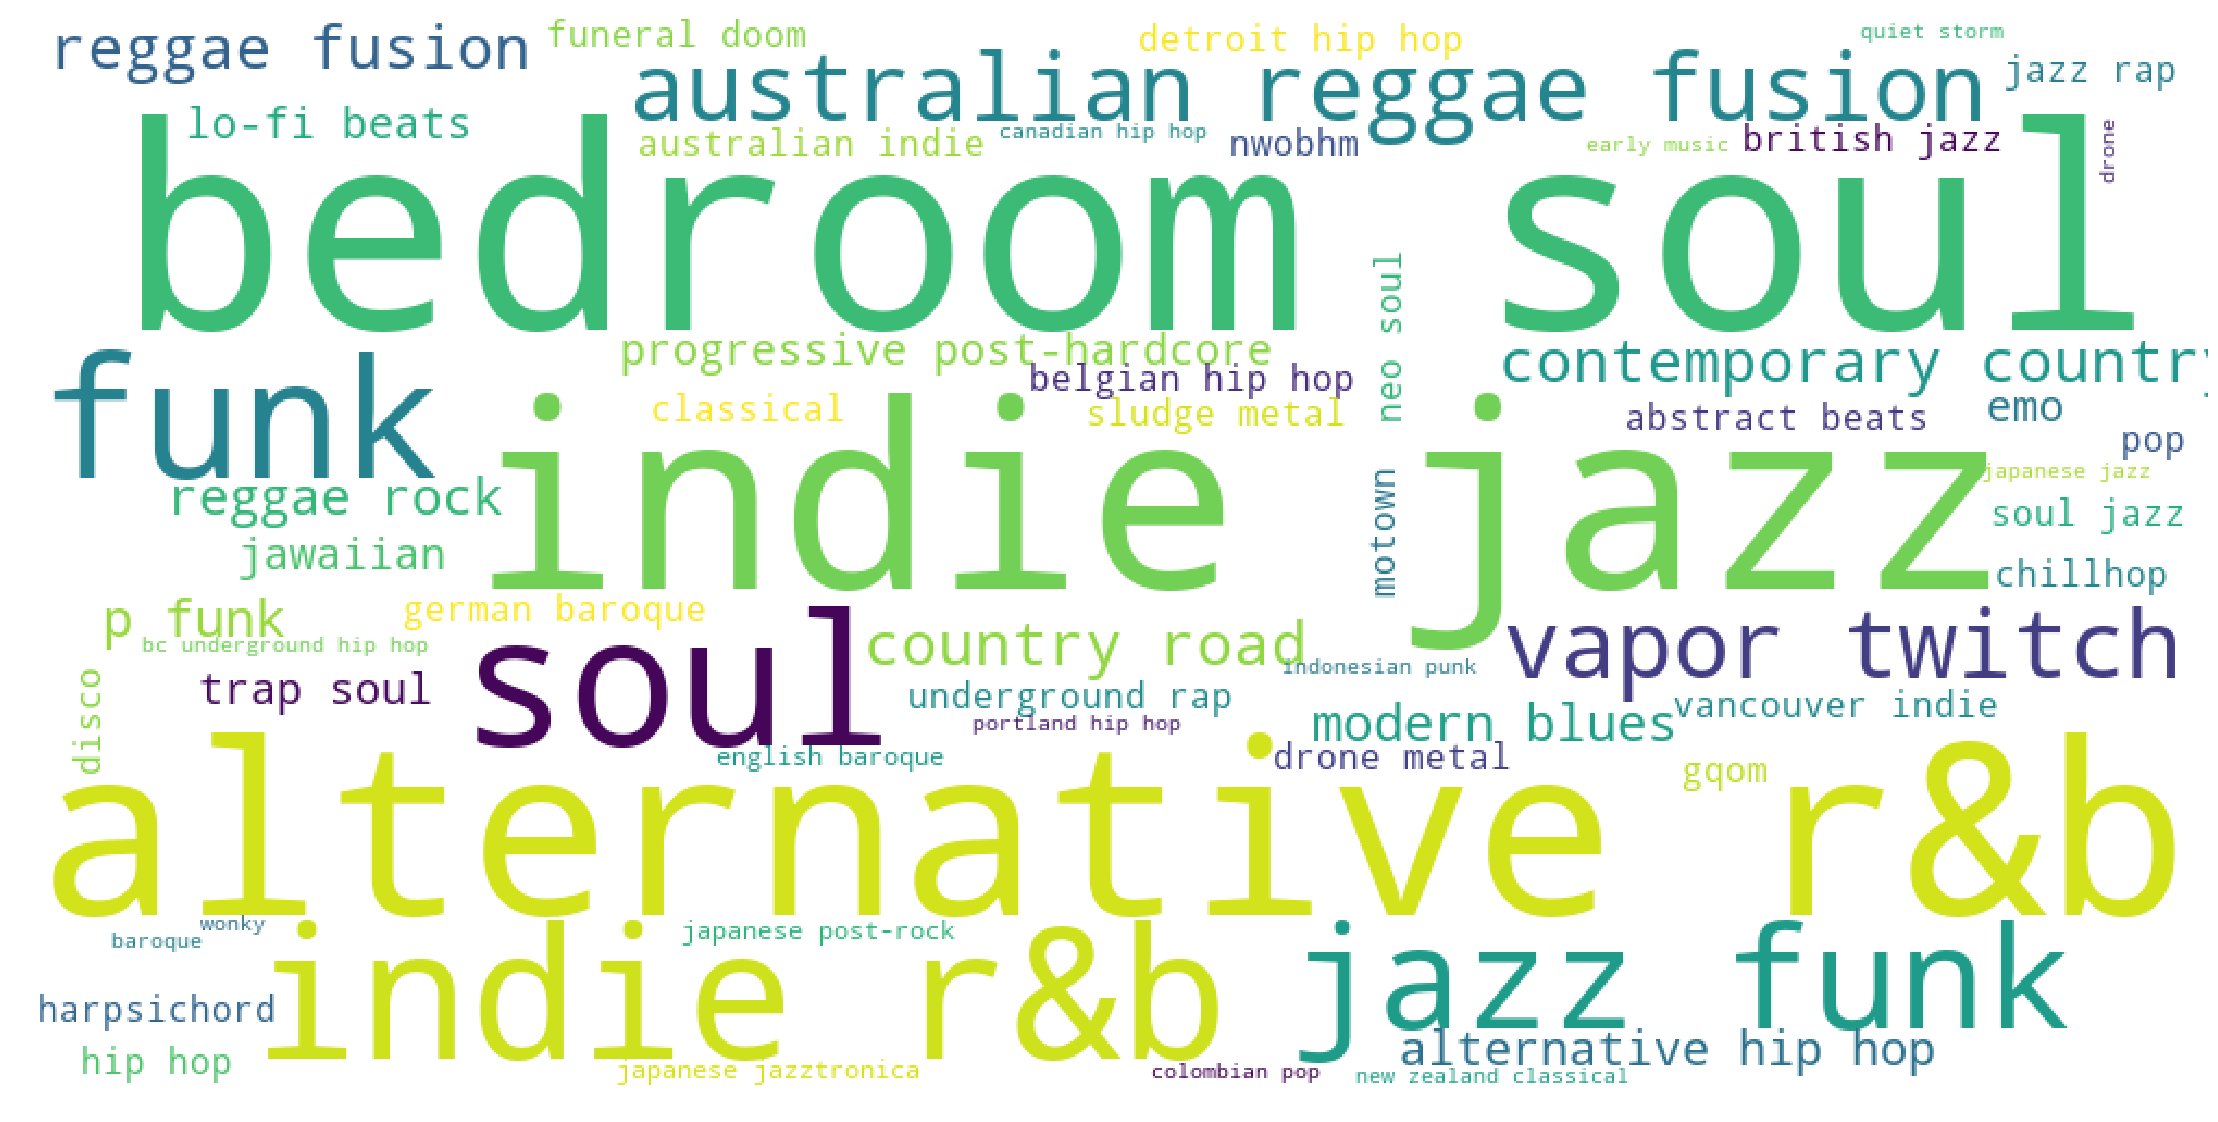

In [13]:
taste_wc = create_word_cloud(taste_genres)

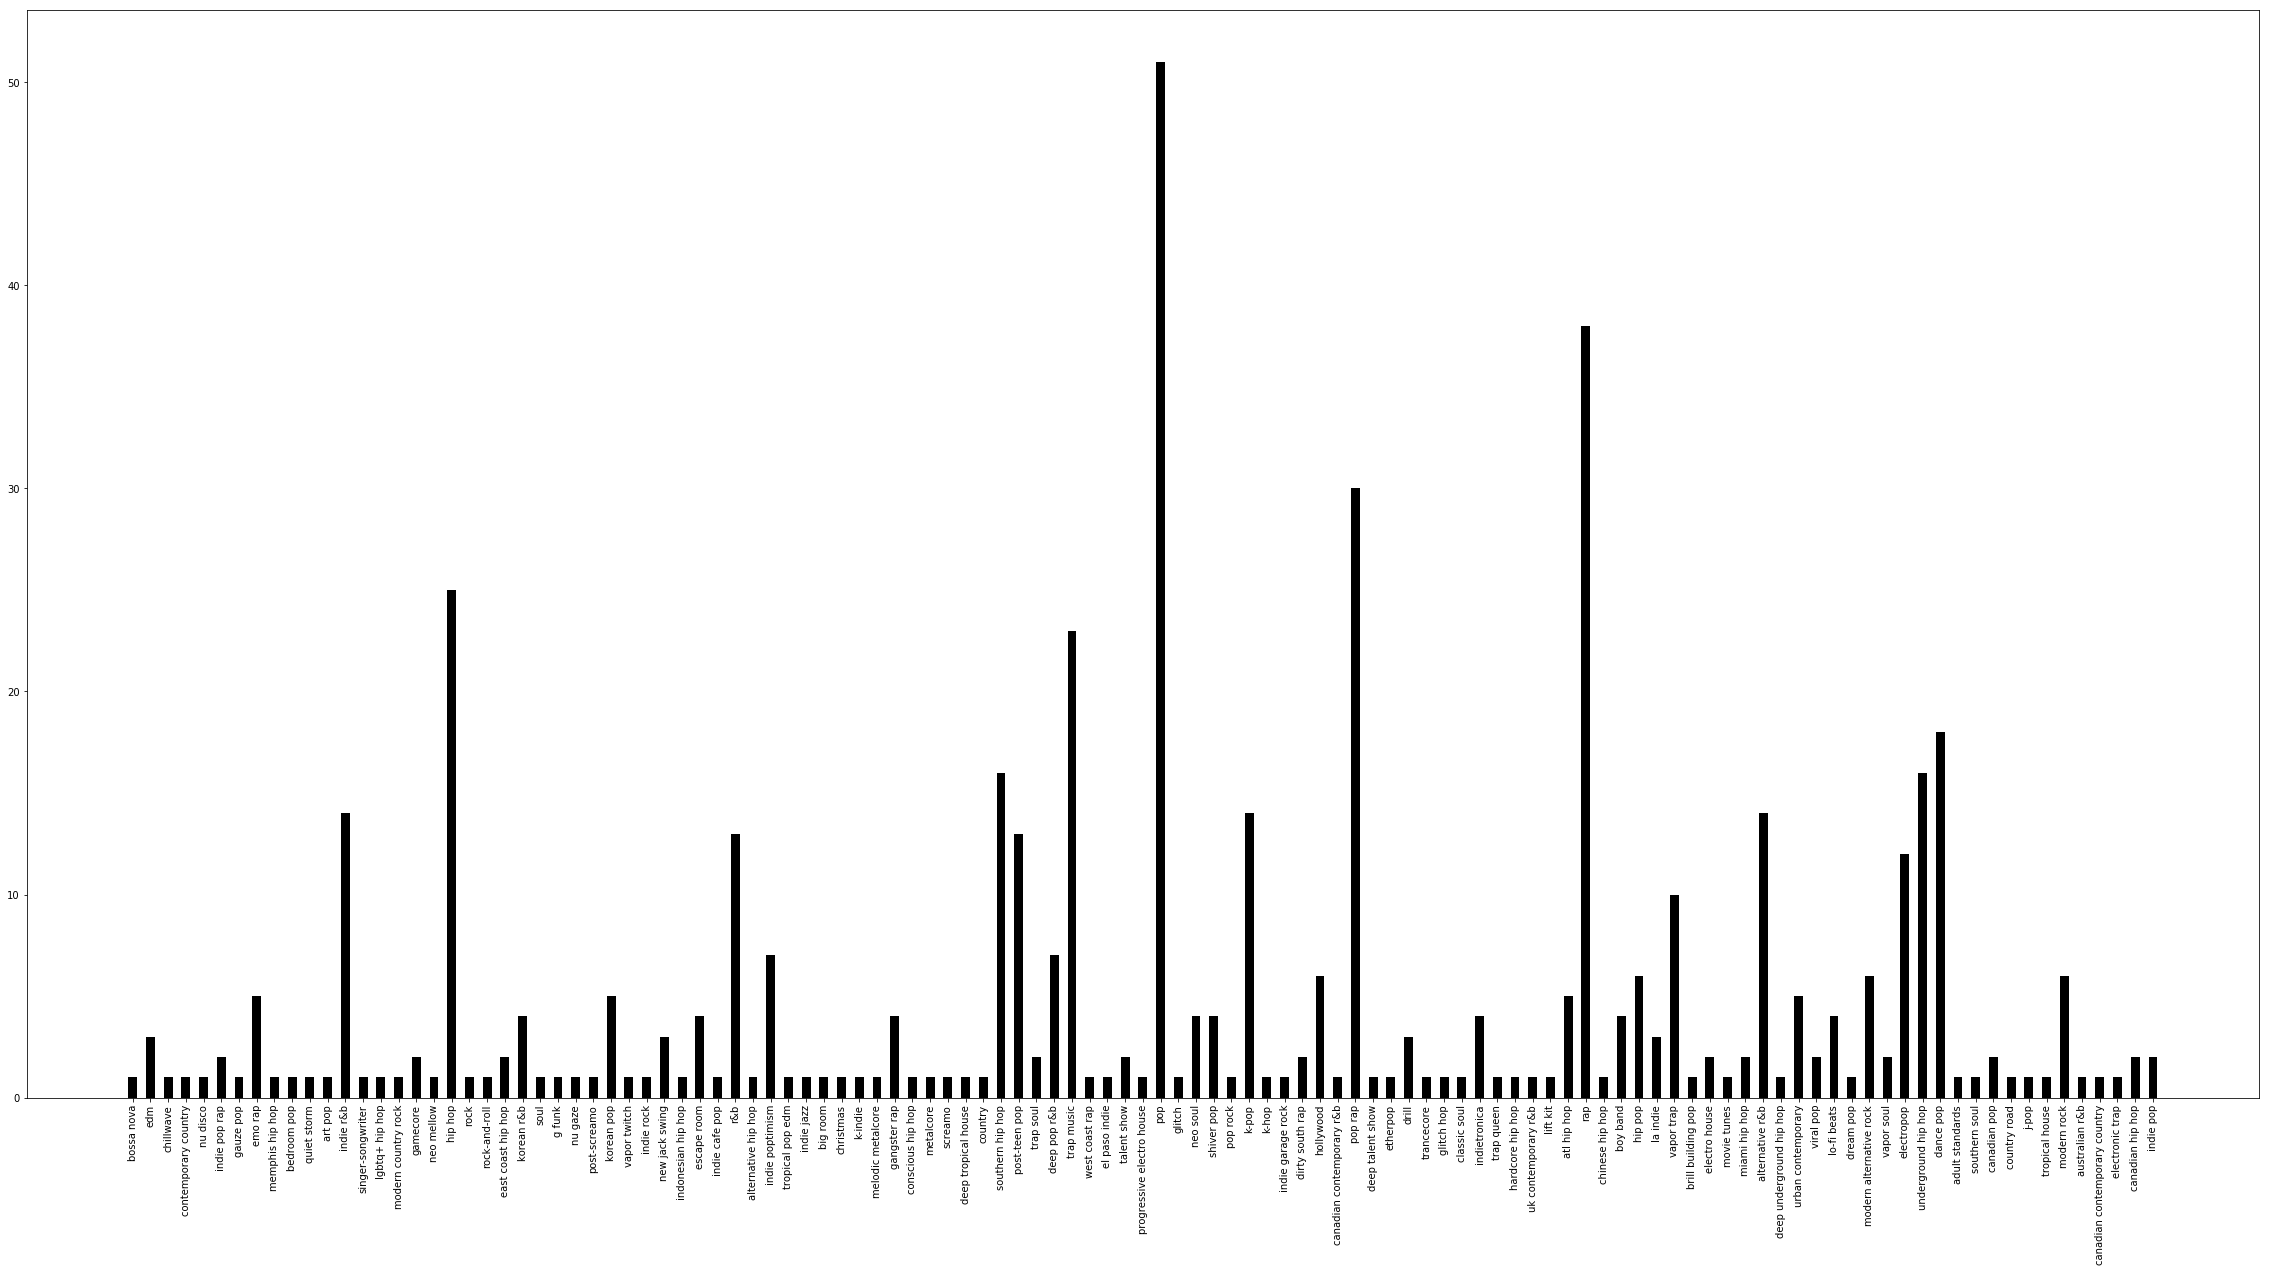

In [14]:
plt.figure(figsize=(40,20))
plt.bar(top_genres.keys(), top_genres.values(), width =0.5, color='black')
plt.xticks(rotation='vertical')
plt.show()

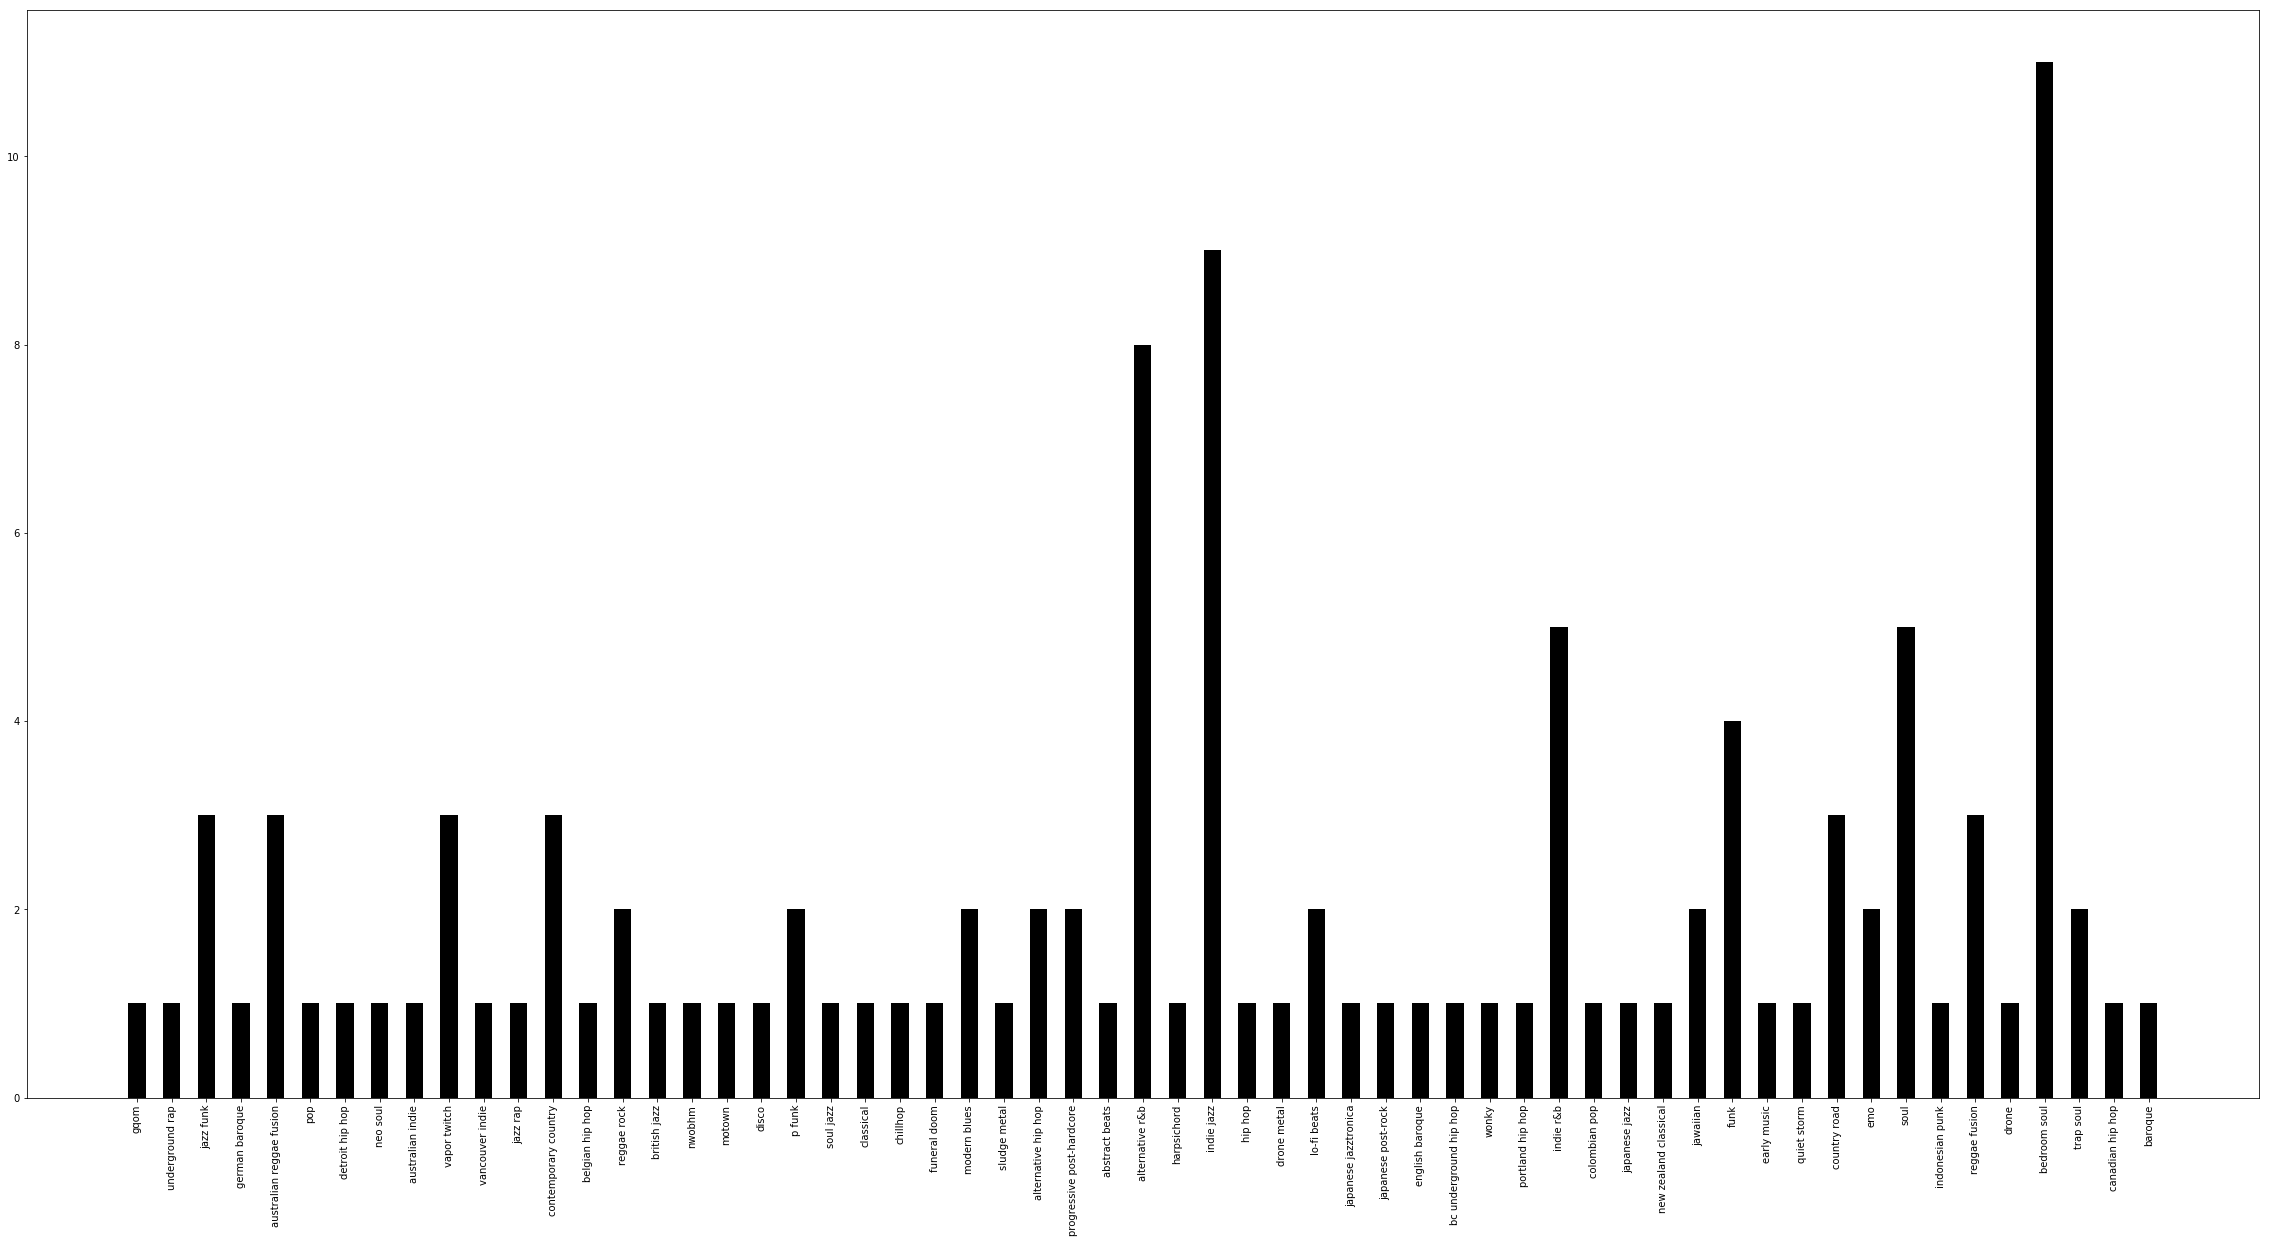

In [15]:
plt.figure(figsize=(40,20))
plt.bar(taste_genres.keys(), taste_genres.values(), width =0.5, color='black')
plt.xticks(rotation='vertical')
plt.show()

In [16]:
only_top = []
in_both = []
only_taste = []
only_top_copy = top_genres.copy()
for genre in taste_genres: 
    if genre in only_top_copy:
        in_both.append(genre)
        only_top_copy.pop(genre)
    else:
        only_taste.append(genre)
        
only_top = only_top_copy.keys()

print only_top
print in_both
print only_taste

[u'bossa nova', u'el paso indie', u'underground hip hop', u'progressive electro house', u'edm', u'glitch', u'chillwave', u'shiver pop', u'pop rock', u'indie pop rap', u'k-pop', u'gauze pop', u'emo rap', u'dance pop', u'k-hop', u'indie garage rock', u'indietronica', u'hollywood', u'memphis hip hop', u'miami hip hop', u'canadian contemporary r&b', u'pop rap', u'art pop', u'singer-songwriter', u'deep talent show', u'lgbtq+ hip hop', u'modern country rock', u'deep underground hip hop', u'gamecore', u'neo mellow', u'drill', u'rock', u'trancecore', u'nu disco', u'east coast hip hop', u'adult standards', u'classic soul', u'dirty south rap', u'korean r&b', u'trap queen', u'etherpop', u'hardcore hip hop', u'g funk', u'lift kit', u'glitch hop', u'rap', u'uk contemporary r&b', u'nu gaze', u'post-screamo', u'boy band', u'hip pop', u'la indie', u'korean pop', u'vapor trap', u'indie rock', u'new jack swing', u'indonesian hip hop', u'escape room', u'indie cafe pop', u'brill building pop', u'electro h

In [8]:
top_df = get_audio_features_from_playlist(top_songs_2018)
top_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
PICK IT UP (feat. A$AP Rocky),0.0149,0.921,191252,0.467,0.000238,1,0.3340,-8.443,1,0.1190,135.995,0.287
Sunflower - Spider-Man: Into the Spider-Verse,0.5510,0.753,158053,0.498,0.000000,2,0.0706,-5.610,1,0.0504,89.950,0.927
Midsummer Madness,0.3590,0.409,280842,0.678,0.000005,9,0.1670,-7.731,1,0.0878,89.968,0.168
Surreal,0.2360,0.301,238652,0.654,0.000000,0,0.1280,-5.892,1,0.2370,177.941,0.203
Mine,0.0161,0.710,131064,0.789,0.000003,4,0.4510,-3.874,1,0.0722,142.929,0.717


In [9]:
taste_df= get_audio_features_from_playlist(taste_breakers)
taste_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
Honesty,0.919,0.616,191000,0.204,0.000000,6,0.106,-11.421,0,0.0331,79.826,0.419
Napkins,0.431,0.747,215625,0.444,0.000001,0,0.106,-8.976,0,0.3860,144.138,0.660
Waiting,0.865,0.477,168000,0.286,0.000029,0,0.123,-12.757,1,0.2380,75.429,0.364
Skin,0.512,0.674,230625,0.616,0.000002,7,0.331,-3.471,1,0.0272,94.934,0.551
Flowers,0.524,0.466,181238,0.413,0.000000,3,0.374,-11.772,0,0.4450,172.941,0.366


In [79]:
def box_comparison(column):
    fig, ax = plt.subplots()
    top_box = top_df.boxplot(column=column,positions=[1])
    taste_box = taste_df.boxplot(column=column,positions=[2])
    ax.autoscale()
    ax.set_xlim(0.5,2.5)
    ax.set(xticks=[1,2], xticklabels = ['top songs', 'tastebreakers'])
    return plt 


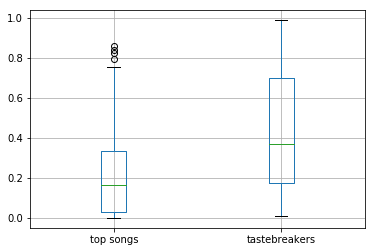

In [76]:
acoustic_plot = box_comparison("acousticness")

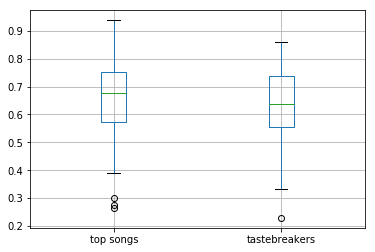

In [81]:
danceability_plot = box_comparison("danceability")

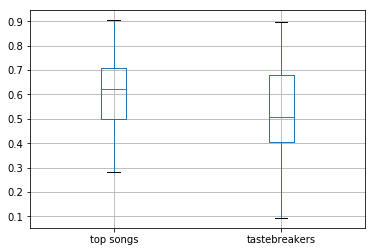

In [82]:
energy_plot = box_comparison("energy")

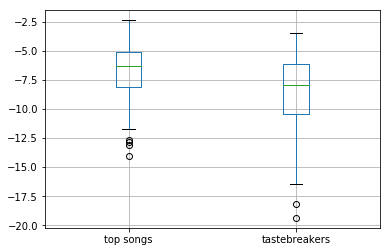

In [83]:
loudness_plot = box_comparison("loudness")

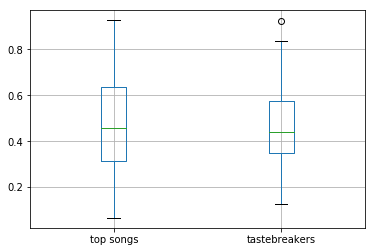

In [84]:
valence_plot = box_comparison("valence")